Importing necessary libraries:

In [72]:
import numpy as np
import pandas as pd
import sys
import sklearn
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset:

In [73]:
data = pd.read_csv('housing.csv')

In [74]:
data.head()

,rm,lstat,ptratio,medv
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [75]:
prices = data['medv']
features = data.drop('medv', axis=1)
print("Boston housing dataset has {} data points with {} variables each" .format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each


## Data Exploration:

The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

In [76]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Stats for the boston housing data:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price: ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Stats for the boston housing data:

Minimum price: $105000
Maximum price: $1024800
Mean price: $454342.9447852761
Median price: $438900.0
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation

We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**High values of 'RM' and lower values of 'LSTAT' and 'PTRATIO' indicates high price of houses in that neighborhood. Lower values of 'RM' and high values of 'LSTAT' and 'PTRATIO' indicates lower prices of houses in the region.**

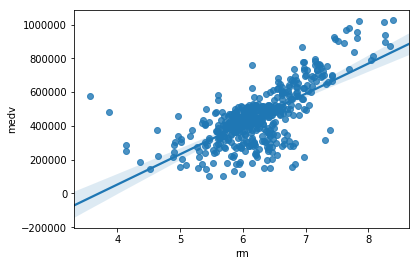

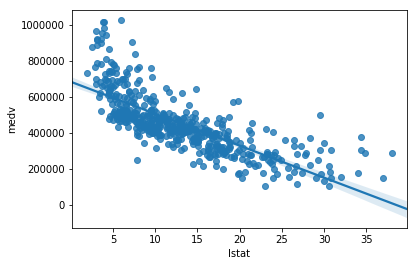

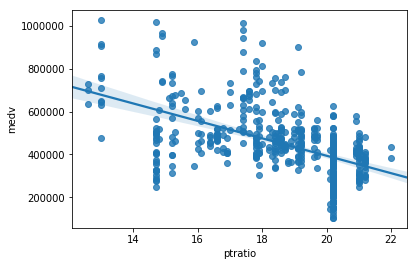

In [77]:
for var in ['rm', 'lstat', 'ptratio']:
    sns.regplot(data[var], prices)
    plt.show()

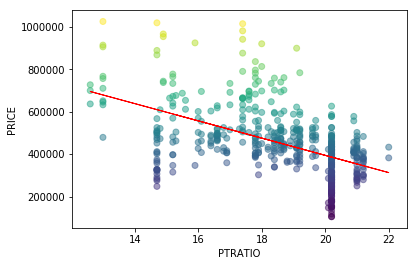

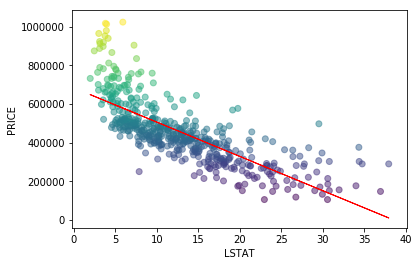

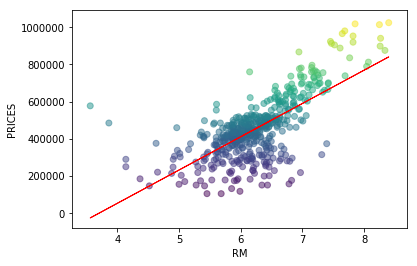

In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

"""PTRATIO"""
pt_ratio = data['ptratio'].values.reshape(-1,1)
reg.fit(pt_ratio, prices)
plt.plot(pt_ratio, reg.predict(pt_ratio), color="red", linewidth=1)
plt.scatter(pt_ratio, prices, alpha=0.5, c=prices)
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.show()

"""LSTAT"""
lstat = data['lstat'].values.reshape(-1,1)
reg.fit(lstat, prices)
plt.plot(lstat, reg.predict(lstat), color='red', linewidth=1)
plt.scatter(lstat, prices, alpha=0.5, c=prices)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

"""RM"""
rm = data['rm'].values.reshape(-1, 1)
reg.fit(rm, prices)
plt.plot(rm, reg.predict(rm), color='red', linewidth=1)
plt.scatter(rm, prices, alpha=0.5, c=prices)
plt.xlabel('RM')
plt.ylabel('PRICES')
plt.show()

## Developing a Model:

### Implementation: Define a Performance Metric

In [79]:
from sklearn.metrics import r2_score

In [80]:
def performance_metric(y_true, y_predict):    
    score = r2_score(y_true, y_predict)
    return score

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

## Analyzing Model Performances:

### Learning Curves:

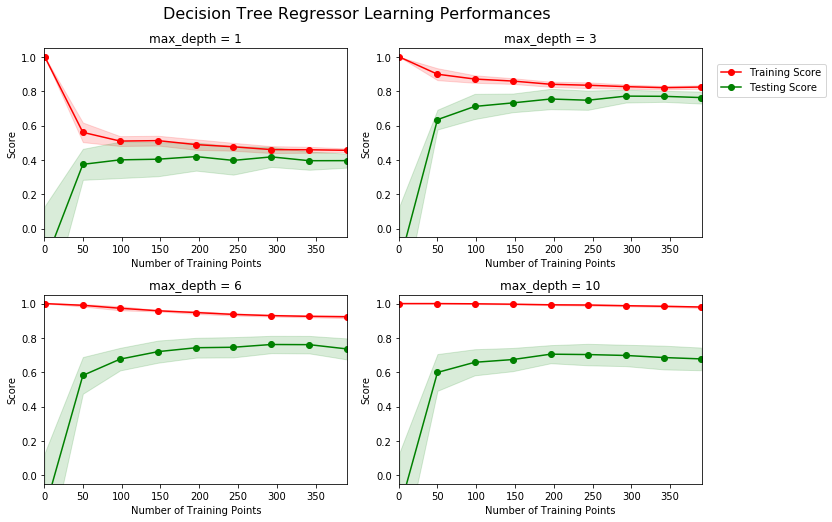

In [82]:
vs.ModelLearning(features, prices)

The convergence, specially from 300 to 350 points of the curves presented in max_depth=3 shows that is not needed more samples to decrease the error. Adding more points is not necessary due the convergence of training and testing curves. The max_depth=1 indicates underfitting because the R2 score is too low and can not explain verify well the model. The max_depth=6 indicates an approach that will require more data to check if there is a convergence of the curves. It is a little bit overfitted. Finally, the max_depth=10 is totally overfitted, sice the R2 score is near a constant on 100%. There is no indications of convergence of the curves. The model parameters must be reviewed.

### Complexity Curves:

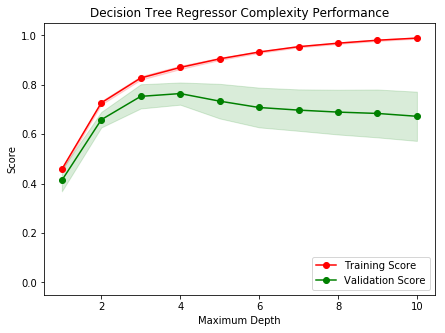

In [83]:
vs.ModelComplexity(X_train, y_train)

Produced a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

### Question 5 - Bias-Variance Tradeoff

With maximum depth of 1 the model suffer from high bias (underfitting) and less standard deviation, compared to other depths, its R2 score is too low (~0.3). The maximum depth of 10 indicates a better R2 score (~0.5) but with high variance, more standard deviation (overfitting), despite the training model has an excelent R2 score (1) is not able to deal with unknown data or testing data (R2 score ~5). The right spot is the maximum depth from 2 to 3 due to high R2 score from both training and testing and less variance.

### Question 6 - Best-Guess Optimal Model

 According to the graph, the maximum depth that the best generalizes new data is related to highest **r2 score**, which is **3**.

## Evaluating Model Performance

In [84]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=42)
    regressor = DecisionTreeRegressor()
    params = {"max_depth": range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

### Question 7 - Optimal Model

In [85]:
reg = fit_model(X_train, y_train)
print("The parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

The parameter 'max_depth' is 3 for the optimal model.


### Question 8 - Predicting Selling Prices

In [87]:
#Matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $345,707.55
Predicted selling price for Client 2's home: $260,645.00
Predicted selling price for Client 3's home: $903,393.75


The prices are reasonabled so I would follow the recomendations of model. The client 1, expected to have the second highest price, it has 5 rooms (1 room more than client 2 and 3 rooms less than clinet 3) and less poverty level and less student-teacher ratio compared to client 2, but more compared to client 3. The client 2 was expected to have the lowest price due to lowest number of rooms and highest poverty level and student-teacher ratio. The client 3 was expected to have the more expensive house because there are more rooms than other clients, the poverty level is the lowest as well the realation of student-teacher.

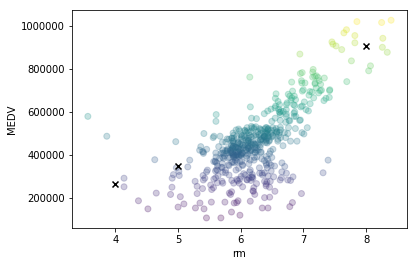

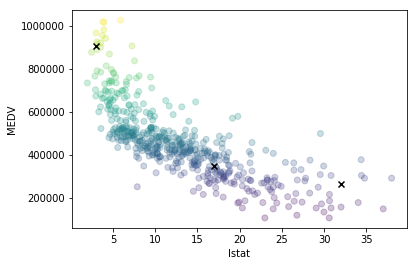

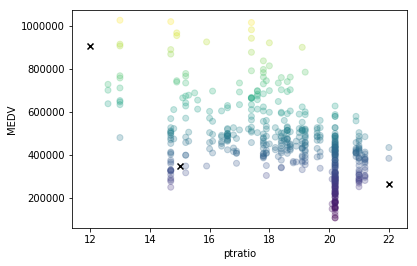

In [88]:
clients = np.transpose(client_data)
pred = reg.predict(client_data)

for i, feat in enumerate(['rm', 'lstat', 'ptratio']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()

### Question 9 - Sensitivity

In [90]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $390,250.00
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $30,372.22


### Question 10 - Applicability

The data must be normalized, so the inflation effects will be adjusted to present monetary values. The features selected gives us a good idea how to describe a feasible price of home. If is available, information like square feet of plot area and pool presence could refine the model. Will require a domain expert validation to check the weigh of each new feature. Yes, we can affirm based on test of 10 triais, the variance was less than 10%, which is a good reference for dealing with unknown data. No, rural city has its own features and characteristics. Must be reviewed if is needed to add or remove features. Yes, the characteristics of the entire neighborhood tend do indicate better conditions to living and development, with more education and less poverty.